# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

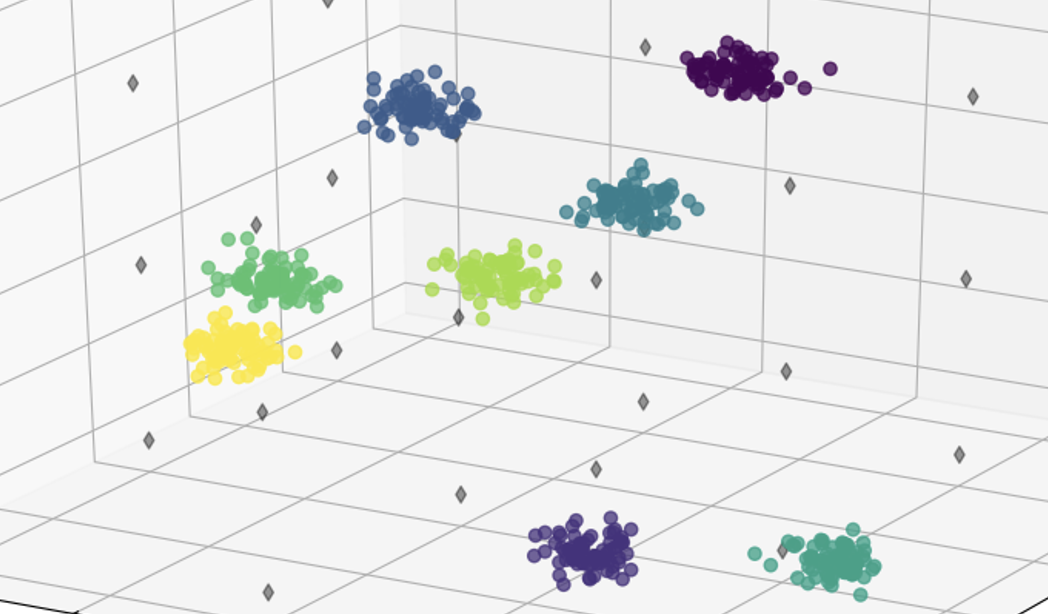

In [21]:
n_points = 500

mean_class1 = [2, 2]
cov_class1 = [[1, 0.8], [0.8, 1]]
class1_points = np.random.multivariate_normal(mean_class1, cov_class1, n_points)

mean_class2 = [5, 5]
cov_class2 = [[1, 0.8], [0.8, 1]]
class2_points = np.random.multivariate_normal(mean_class2, cov_class2, n_points)

class1_labels = np.ones(n_points)
class2_labels = np.full(n_points, 2)

points = np.vstack((class1_points, class2_points))
labels = np.hstack((class1_labels, class2_labels))

In [22]:
data = pd.DataFrame({
    'x': points[:, 0],
    'y': points[:, 1],
    'class': labels
})
data.to_csv('dataset_task1(hw2).csv', index=False)

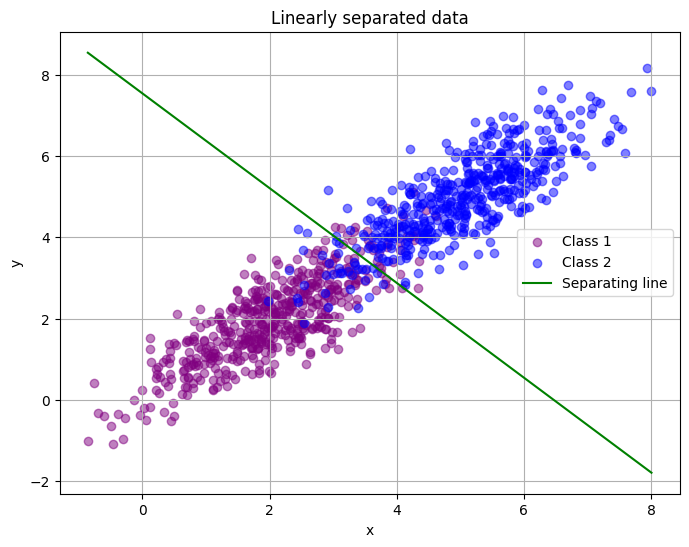

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(points, labels)

x_values = np.array([min(points[:, 0]), max(points[:, 0])])
y_values = -(logistic_model.intercept_ + logistic_model.coef_[0][0] * x_values) / logistic_model.coef_[0][1]

plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], c='purple', label='Class 1', alpha=0.5)
plt.scatter(class2_points[:, 0], class2_points[:, 1], c='blue', label='Class 2', alpha=0.5)
plt.plot(x_values, y_values, color='green', label='Separating line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linearly separated data')
plt.legend()
plt.grid(True)
plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

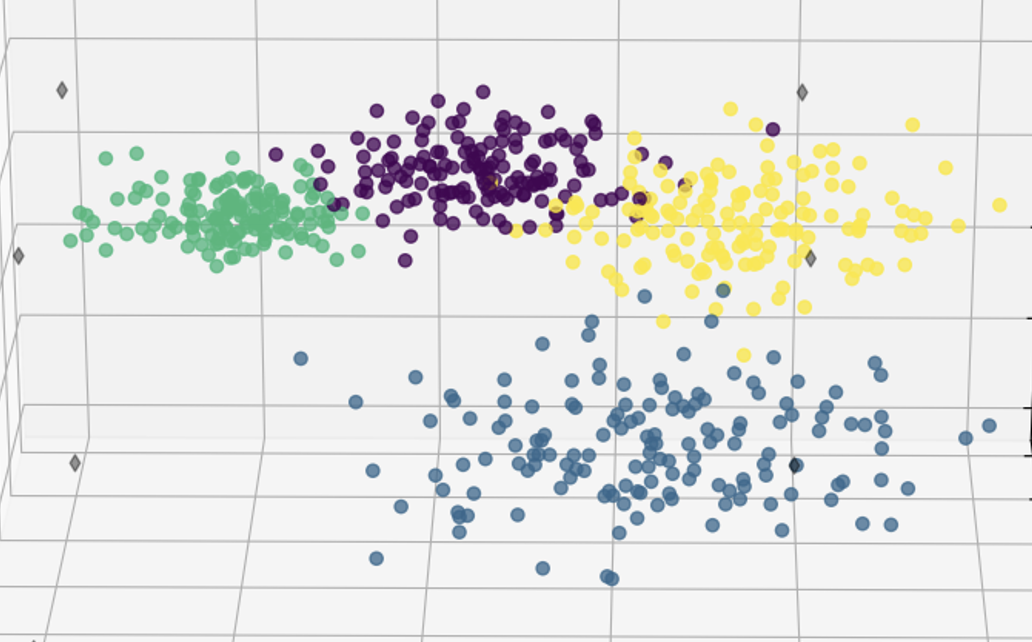

In [24]:
n_points = 300
centers = [(2, 2), (5, 5), (8, 2)]
std_dev = 1.5

np.random.seed(42)
data_class1 = np.random.normal(loc=centers[0], scale=std_dev, size=(n_points, 2))
data_class2 = np.random.normal(loc=centers[1], scale=std_dev, size=(n_points, 2))
data_class3 = np.random.normal(loc=centers[2], scale=std_dev, size=(n_points, 2))

In [25]:
data = np.vstack((data_class1, data_class2, data_class3))
labels = np.array([1] * n_points + [2] * n_points + [3] * n_points)
dataset = pd.DataFrame(data, columns=['x', 'y'])
dataset['class'] = labels
dataset.to_csv('dataset_task2(hw2).csv', index=False)

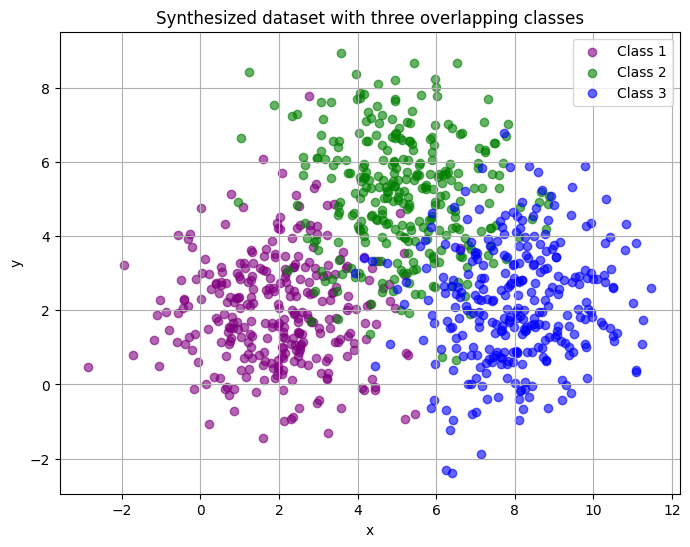

,x,y,class
0,2.745071,1.792604,1
1,2.971533,4.284545,1
2,1.648770,1.648795,1
3,4.368819,3.151152,1
4,1.295788,2.813840,1


In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(data_class1[:, 0], data_class1[:, 1], c='purple', label='Class 1', alpha=0.6)
plt.scatter(data_class2[:, 0], data_class2[:, 1], c='green', label='Class 2', alpha=0.6)
plt.scatter(data_class3[:, 0], data_class3[:, 1], c='blue', label='Class 3', alpha=0.6)
plt.title('Synthesized dataset with three overlapping classes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

dataset.head()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

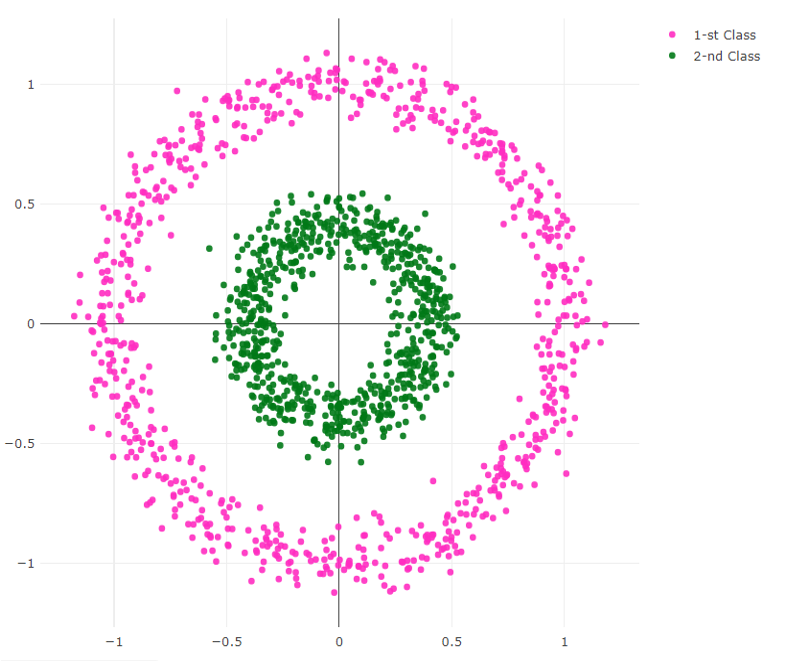

In [10]:
n_points = 500
inner_radius = 3
inner_width = 0.5
outer_radius = 6
outer_width = 1

In [11]:
theta_inner = np.random.uniform(0, 2 * np.pi, n_points)
r_inner = np.random.normal(inner_radius, inner_width, n_points)
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

theta_outer = np.random.uniform(0, 2 * np.pi, n_points)
r_outer = np.random.normal(outer_radius, outer_width, n_points)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

In [13]:
data_torus = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))))
labels_torus = np.array([1] * n_points + [2] * n_points)
dataset_torus = pd.DataFrame(data_torus, columns=['x', 'y'])
dataset_torus['class'] = labels_torus
dataset_torus.to_csv('dataset_task3(hw2).csv', index=False)

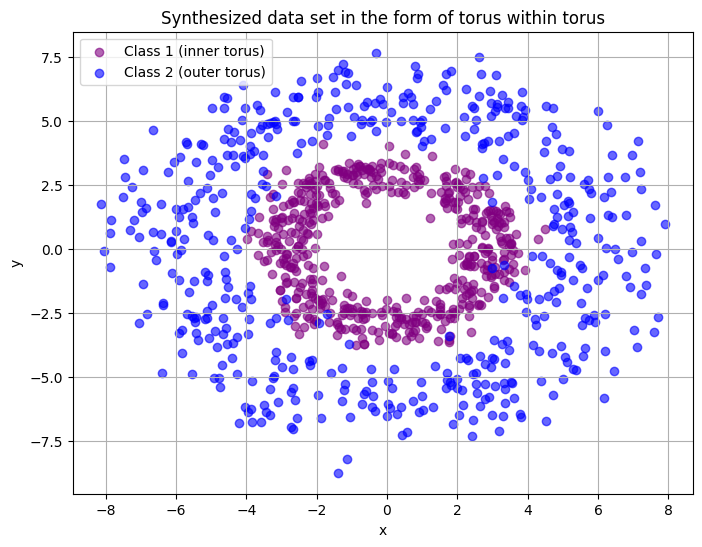

,x,y,class
0,-2.519709,0.102225,1
1,-0.956261,-3.091694,1
2,3.738247,-0.168833,1
3,2.153589,2.336773,1
4,-0.440079,2.809209,1


In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(x_inner, y_inner, c='purple', label='Class 1 (inner torus)', alpha=0.6)
plt.scatter(x_outer, y_outer, c='blue', label='Class 2 (outer torus)', alpha=0.6)
plt.title('Synthesized data set in the form of torus within torus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
dataset_torus.head()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

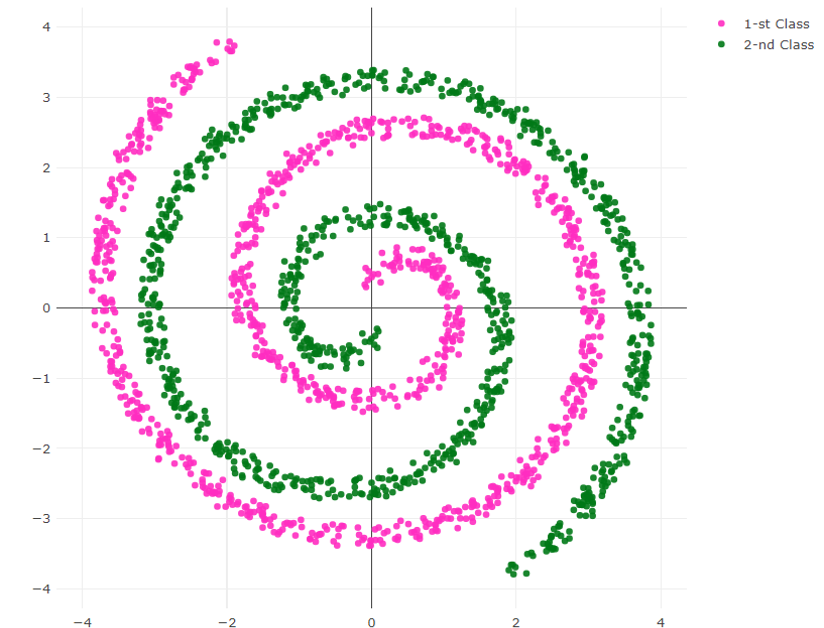

In [16]:
n_points = 500
n_turns = 3
noise = 0.2

In [17]:
theta_1 = np.linspace(0, n_turns * 2 * np.pi, n_points)
r_1 = theta_1
x_1 = r_1 * np.cos(theta_1) + np.random.normal(0, noise, n_points)
y_1 = r_1 * np.sin(theta_1) + np.random.normal(0, noise, n_points)

theta_2 = np.linspace(0, n_turns * 2 * np.pi, n_points)
r_2 = theta_2
x_2 = r_2 * np.cos(-theta_2) + np.random.normal(0, noise, n_points)
y_2 = r_2 * np.sin(-theta_2) + np.random.normal(0, noise, n_points)

In [18]:
data_spirals = np.vstack((np.column_stack((x_1, y_1)), np.column_stack((x_2, y_2))))
labels_spirals = np.array([1] * n_points + [2] * n_points)
dataset_spirals = pd.DataFrame(data_spirals, columns=['x', 'y'])
dataset_spirals['class'] = labels_spirals
dataset_spirals.to_csv('dataset_task4(hw2).csv', index=False)

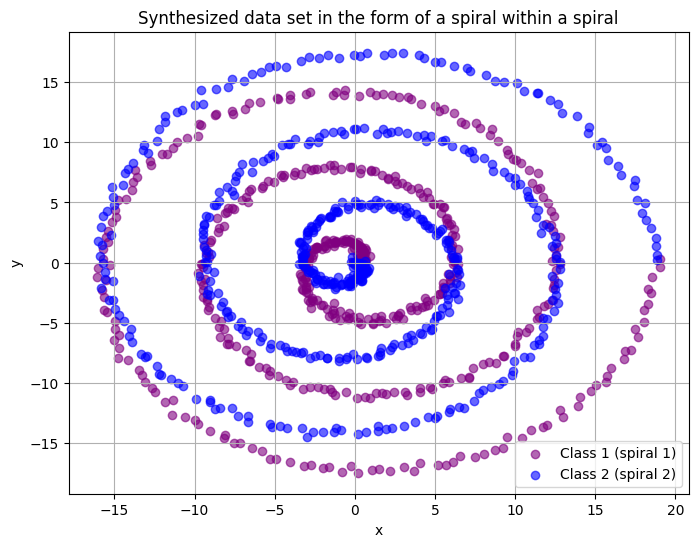

,x,y,class
0,0.156426,-0.012528,1
1,-0.120432,0.050051,1
2,-0.080637,-0.053146,1
3,0.328994,0.284132,1
4,-0.120538,-0.017326,1


In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x_1, y_1, c='purple', label='Class 1 (spiral 1)', alpha=0.6)
plt.scatter(x_2, y_2, c='blue', label='Class 2 (spiral 2)', alpha=0.6)
plt.title('Synthesized data set in the form of a spiral within a spiral')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
dataset_spirals.head()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

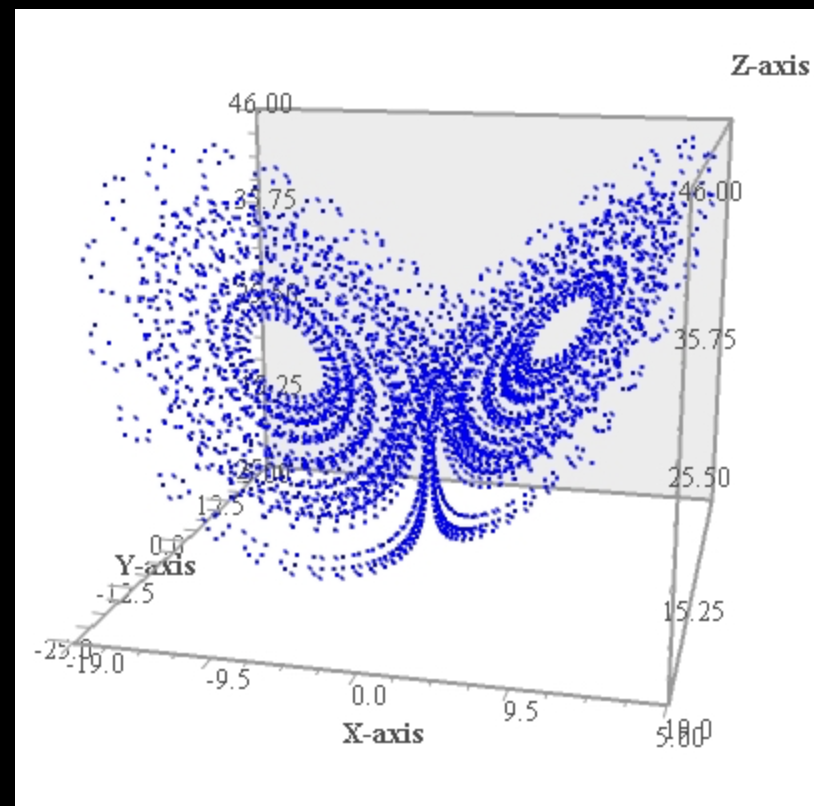

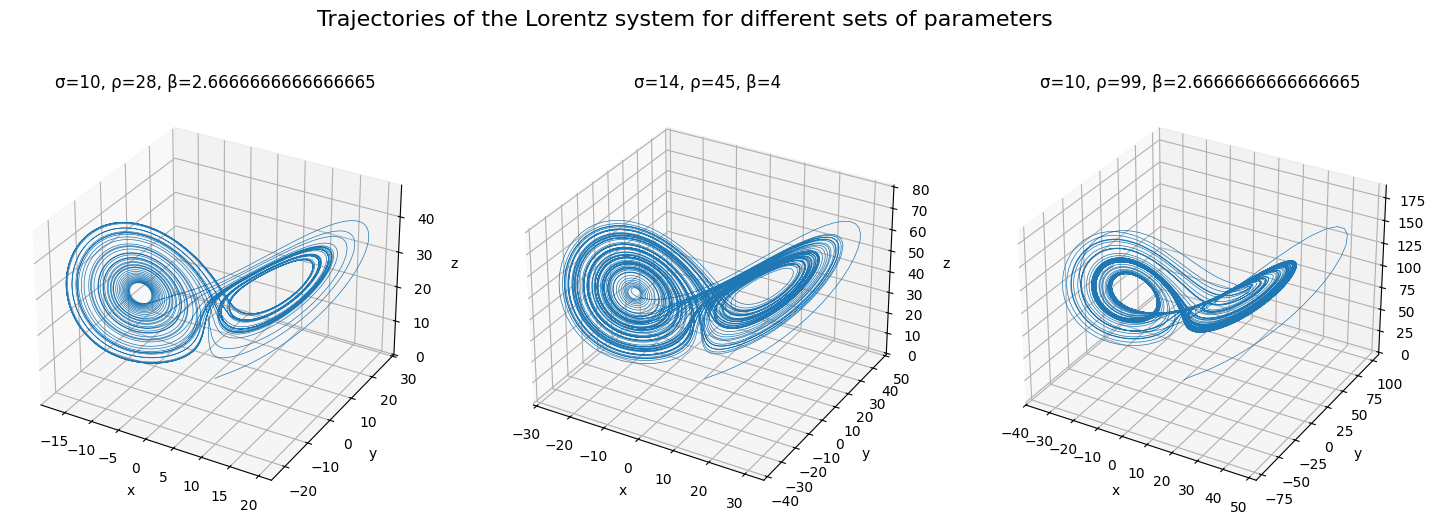

In [20]:
def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

params_sets = [
    {"sigma": 10, "rho": 28, "beta": 8/3},
    {"sigma": 14, "rho": 45, "beta": 4},
    {"sigma": 10, "rho": 99, "beta": 8/3}
]

initial_state = [1.0, 1.0, 1.0]
t = np.linspace(0, 50, 10000)
fig = plt.figure(figsize=(18, 6))
fig.suptitle('Trajectories of the Lorentz system for different sets of parameters', fontsize=16)

for i, params in enumerate(params_sets):
    trajectory = odeint(lorenz_system, initial_state, t, args=(params['sigma'], params['rho'], params['beta']))
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5)
    ax.set_title(f"σ={params['sigma']}, ρ={params['rho']}, β={params['beta']}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
plt.show()
